In [89]:
import pandas as pd

In [90]:
df = pd.read_csv('./Clientes_Tienda.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [91]:
df.drop(columns=['CustomerID'], inplace=True)

In [92]:
#Renombrar las columnas
df.rename(columns={'Genre': 'Genero', 'Age': 'Edad', 'Annual Income (k$)': 'Ingresos', "Spending Score (1-100)": "GastosScore"}, inplace=True)
#Seleccionar las columnas de interés
df.head()


,Genero,Edad,Ingresos,GastosScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [93]:
df["Genero"] = df["Genero"].map({
    "Male": 1,
    "Female": 0
})


In [94]:
x = df[['Ingresos', 'GastosScore', "Edad", "Genero"]]
df.head()

,Genero,Edad,Ingresos,GastosScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


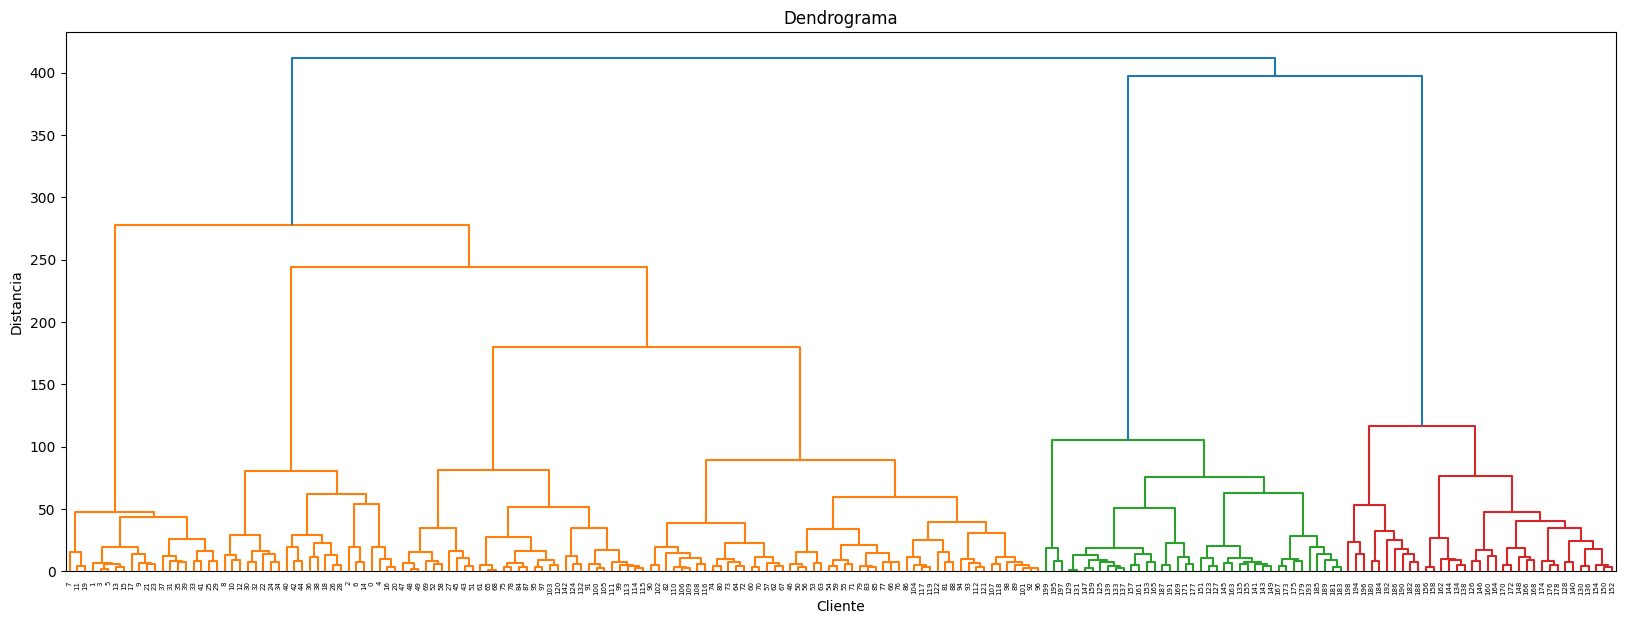

In [95]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 7))
linked = linkage(x, method='ward', metric='euclidean')
dendrogram(linked, orientation='top',show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Cliente')
plt.ylabel('Distancia')
plt.show()

In [96]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
y_hc = hc.fit_predict(x)

In [97]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [98]:
Clusters = pd.DataFrame(y_hc, columns=['Clientes'])
Clusters.value_counts().sort_index()
x = x.values

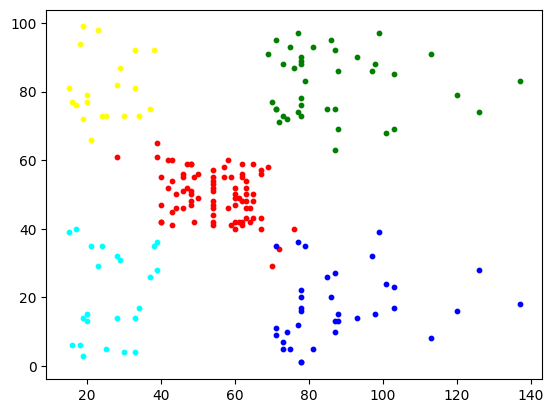

In [99]:

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s=10, c='red', label='Cluster 0')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s=10, c='blue', label='Cluster 0')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s=10, c='green', label='Cluster 0')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s=10, c='yellow', label='Cluster 0')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s=10, c='cyan', label='Cluster 0')

plt.show()

In [102]:
df ["Cluster"] = y_hc

In [104]:
pd.set_option("display.float_format", lambda x:'%.0f' %x)
df.groupby("Cluster").describe().T

Cluster            0   1   2  3  4
Genero      count 83  35  39 20 23
            mean   0   1   0  0  0
            std    0   1   1  1  0
            min    0   0   0  0  0
            25%    0   0   0  0  0
            50%    0   1   0  0  0
            75%    1   1   1  1  1
            max    1   1   1  1  1
Edad        count 83  35  39 20 23
            mean  42  42  33 25 45
            std   17  11   4  5 13
            min   18  19  27 18 19
            25%   27  35  30 21 36
            50%   45  43  32 23 46
            75%   54  48  36 29 54
            max   70  59  40 35 67
Ingresos    count 83  35  39 20 23
            mean  55  88  87 25 26
            std   10  16  16  7  8
            min   28  71  69 15 15
            25%   48  78  76 19 20
            50%   54  85  79 24 25
            75%   62  98  95 31 33
            max   76 137 137 38 39
GastosScore count 83  35  39 20 23
            mean  50  17  82 81 21
            std    7  10   9 10 13
            min   29   1  63 66  3
            25%   44  10  74 73 10
            50%   50  16  83 78 17
            75%   55  24  90 88 34
            max   65  39  97 99 40